In [1189]:
# Full name: Mai Xuan Bach
# ID: 11200489

In [1190]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1191]:
class LinearRegressionLR:
    def __init__(self):
        pass
        
    def fit(self, X, Y):
        '''Fit the linear regression model
        X: A matrix whose columns are the independent variables
        Y: A/an matrix/array, which is the dependent variable
        '''
        
        # Add an only-ones-column to X
        self._original_X = X
        self._X = np.insert(X, 0, [1] * X.shape[0], axis = 1)
        
        # Reshape Y to the right shape
        self._Y = np.array(Y).reshape(-1, 1)
        
        # Compute W
        self._W = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(self._X), self._X)), np.transpose(self._X)), self._Y)
    
    def fit_ridge(self, X, Y):
        '''Fit the Ridge regression model
        X: A matrix whose columns are the independent variables
        Y: A/an matrix/array, which is the dependent variable
        '''
        
        # Add an only-ones-column to X
        self._original_X = X
        self._X = np.insert(X, 0, [1] * X.shape[0], axis = 1)
        
        # Reshape Y to the right shape
        self._Y = np.array(Y).reshape(-1, 1)
        
        # Compute W
        alpha = 0.0001
        n, m = self._X.shape
        
        I = np.identity(m)
        self._W = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(self._X), self._X) + alpha * I), np.transpose(self._X)), self._Y)
        
    def fit_lasso(self, X, Y):
        '''Fit the Lasso regression model
        X: A matrix whose columns are the independent variables
        Y: A/an matrix/array, which is the dependent variable
        '''
        self._original_X = X
        
        # Define learning rate, iterations, penality
        self._learning_rate = 0.01
        self._iterations = 10000
        self._penality = 0.005
          
        # Weight initialization
        self._X = np.insert(X, 0, [1] * X.shape[0], axis = 1)
        self._Y = np.array(Y).reshape(-1, 1)
        
        # No_of_training_examples, no_of_features
        self._m, self._n = self._X.shape
        
        # Set up W
        self._W = np.zeros(self._n)

        # Gradient descent learning
        for i in range(self._iterations):
            self.update_weights()
        return self
    
    def update_weights(self):
        """Update weights for gradient descent in lasso fitting"""
        Y_pred = self.predict(self._X, lasso = "Y")
          
        # Calculate gradients  
        dW = np.zeros(self._n)
        for j in range(self._n) :
            if self._W[j] > 0:
                dW[j] = (-2 * (np.transpose(self._X[:, j])).dot(self._Y - np.transpose(Y_pred)) + self._penality) / self._m
          
            else:
                dW[j] = (-2 * (np.transpose(self._X[:, j])).dot(self._Y - np.transpose(Y_pred)) - self._penality) / self._m
        
        # Update weight
        self._W = self._W - self._learning_rate * dW
        return self
        
    def fit_poly(self, x, Y, poly, ridge = None, lasso = None):
        '''Fit the linear regression model
        x: An array (only one column)
        Y: A/an matrix/array, which is the dependent variable
        poly: the polynomial number
        ridge = None (default): fitting ridge regression
        lasso = None (default): fitting lasso regression
        '''
        self._poly = poly

        # Save the features into a list
        features = [x]
        for i in range(1, poly):
            features.append(x ** (i + 1))

        # Construct the X matrix
        X = np.transpose(np.matrix([each for each in features]))

        # Fit
        if ridge:
            self.fit_ridge(X, Y)
        elif lasso:
            self.fit_lasso(X, Y)
        else:
            self.fit(X, Y)
        
    def coef(self):
        "Return the coefficients (matrix W)"
        return self._W
    
    def plot_model(self):
        "Plot model only for simple linear regression"
        # reshape(-1) is a line vector, when reshape(-1,1) is a column
        # to plot, X have to be array to be the same size as Y:
        self._original_X_plot = np.asarray(self._original_X).reshape(-1)
        
        # if not simple LR, could not plot
        if self._original_X.shape[1] != 1:
            raise Exception("This method is only used for simple LR.")
        
        y_pred = self.predict(np.array(self._original_X))
        
        plt.scatter(self._original_X_plot, self._Y, color ='g')
        plt.plot(self._original_X_plot, y_pred, color ='k')
  
        plt.show()
    
    def predict(self, new_X, lasso = None):
        """Predict new value
        new_X: A new matrix of X to predict new Y"""
        
        if lasso == None:
            new_X = np.insert(new_X, 0, [1] * new_X.shape[0], axis = 1)
            
        #print("new X:", new_X, new_X.shape)
        #print("W:", self._W, self._W.shape)
        return np.matmul(new_X, self._W)
    
    def plot_model_polynomial(self, lasso = None):
        "Plot model  for polynomial linear regression"

        # x_plot is the first column of X, that is x^1
        x_plot = np.asarray(self._original_X[:, 0]).reshape(-1)
        
        # Plot the sin curve
        a = np.linspace(0,1,100)
        b = np.sin(np.pi * 2 * a) 
        plt.plot(a, b, color ='g')
        
        # Scatter data points
        plt.scatter(x_plot, self._Y, color ='b', facecolors = "none", edgecolors= "b", s = 50)

        # Plot the model curve
        
        features = [a]
        for i in range(1, self._poly):
            features.append(a ** (i + 1))
        
        # Construct the A matrix
        A = np.transpose(np.matrix([each for each in features]))
        #print("matrix A:", A, A.shape)
        
        if self._poly == 0:
            y_pred = np.transpose(np.matrix([float(self._W[0, 0])] * A.shape[0]))
        else:
            y_pred = self.predict(A)
        #print("y pred:", y_pred, y_pred.shape)

        if lasso:
            plt.plot(np.transpose(np.matrix(a)), np.transpose(y_pred), color ='r')
        else:
            plt.plot(np.asarray(a).reshape(-1), y_pred, color ='r')
            
        plt.xlabel('x')
        plt.ylabel('t')
        plt.annotate("M = {}".format(self._poly), xy=(0.75, 1))
        plt.axis([0, 1, -1.5, 1.5])
        plt.show()

# Ex1.

Fit model parabol linear regression cho dữ liệu: https://github.com/nttuan8/DL_Tutorial/blob/master/L1/data_square.csv

In [1192]:
data_square = pd.read_csv("./data_square.csv")
data_square

,Diện tích,Giá nhà
0,30.0000,-100.0000
1,32.4138,-190.7250
2,34.8276,-269.7980
3,37.2414,-337.2180
4,39.6552,-392.9850
5,42.0690,-437.0990
6,44.4828,-469.5600
7,46.8966,-490.3690
8,49.3103,-499.5240
9,51.7241,-497.0270


In [1193]:
data_square.rename(columns = {"Diện tích" : "size", "Giá nhà": "price"}, inplace=True)

In [1194]:
data_square.head()

,size,price
0,30.0000,-100.000
1,32.4138,-190.725
2,34.8276,-269.798
3,37.2414,-337.218
4,39.6552,-392.985


In [1195]:
data_square["size_square"] = data_square["size"] ** 2

In [1196]:
data_square.head()

,size,price,size_square
0,30.0000,-100.000,900.000000
1,32.4138,-190.725,1050.654430
2,34.8276,-269.798,1212.961722
3,37.2414,-337.218,1386.921874
4,39.6552,-392.985,1572.534887


In [1197]:
# pip install plotly

In [1198]:
import plotly.express as px

# plotting 3-d plot
fig = px.scatter_3d(data_square, x='size', y='size_square', z='price',
              color='price') 
fig.show()

In [1199]:
X = np.matrix(np.array(data_square[["size", "size_square"]]))
X

matrix([[   30.        ,   900.        ],
        [   32.4138    ,  1050.65443044],
        [   34.8276    ,  1212.96172176],
        [   37.2414    ,  1386.92187396],
        [   39.6552    ,  1572.53488704],
        [   42.069     ,  1769.800761  ],
        [   44.4828    ,  1978.71949584],
        [   46.8966    ,  2199.29109156],
        [   49.3103    ,  2431.50568609],
        [   51.7241    ,  2675.38252081],
        [   54.1379    ,  2930.91221641],
        [   56.5517    ,  3198.09477289],
        [   58.9655    ,  3476.93019025],
        [   61.3793    ,  3767.41846849],
        [   63.7931    ,  4069.55960761],
        [   66.2069    ,  4383.35360761],
        [   68.6207    ,  4708.80046849],
        [   71.0345    ,  5045.90019025],
        [   73.4483    ,  5394.65277289],
        [   75.8621    ,  5755.05821641],
        [   78.2759    ,  6127.11652081],
        [   80.6897    ,  6510.82768609],
        [   83.1034    ,  6906.17509156],
        [   85.5172    ,  7313.191

In [1200]:
X.shape

(30, 2)

In [1201]:
Y = np.array(data_square["price"]).reshape(-1, 1)

In [1202]:
Y

array([[-100.    ],
       [-190.725 ],
       [-269.798 ],
       [-337.218 ],
       [-392.985 ],
       [-437.099 ],
       [-469.56  ],
       [-490.369 ],
       [-499.524 ],
       [-497.027 ],
       [-482.878 ],
       [-457.075 ],
       [-419.62  ],
       [-370.511 ],
       [-309.75  ],
       [-237.337 ],
       [-153.27  ],
       [ -57.5505],
       [  49.8216],
       [ 168.847 ],
       [ 299.524 ],
       [ 441.855 ],
       [ 595.838 ],
       [ 761.474 ],
       [ 938.763 ],
       [1127.71  ],
       [1328.3   ],
       [1540.55  ],
       [1764.45  ],
       [2000.    ]])

In [1203]:
Y.shape

(30, 1)

In [1204]:
MLR = LinearRegressionLR()

In [1205]:
MLR.fit_poly(np.asarray(data_square["size"]), Y, 2)

In [1206]:
MLR.coef()

matrix([[ 2.00000579e+03],
        [-1.00000222e+02],
        [ 1.00000199e+00]])

In [1207]:
MLR.predict(np.matrix([[10, 100]]))

matrix([[1100.00377165]])

In [1208]:
# Double check with sklearn
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, Y)
# reg.score(X, Y)
reg.coef_

array([[-100.00022214,    1.00000199]])

In [1209]:
reg.intercept_

array([2000.00579425])

In [1210]:
reg.predict([[10, 100]])

array([[1100.00377165]])

In [1211]:
# Double check the 2nd time with sklearn
X = np.asarray(data_square["size"]).reshape(-1, 1)
y = Y

from sklearn.linear_model import LinearRegression
lin = LinearRegression()
  
lin.fit(X, y)

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)
  
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)
print(lin2.coef_)
print(lin2.intercept_)


[[   0.         -100.00022214    1.00000199]]
[2000.00579425]


# Ex2.

Tự sinh dữ liệu như ở hình dưới:

a. fit đa thức bậc 0, 1, 3, 6, 9, vẽ mô hình và nhận xét mô hình

b. thêm 15, 100 điểm dữ liệu cho đa thức bậc 9, nhận xét mức độ overfitting

c. fit đa thức bậc 9 cho 10 điểm dữ liệu ban đầu nhưng dùng Ridge và Lasso để tránh overfittin

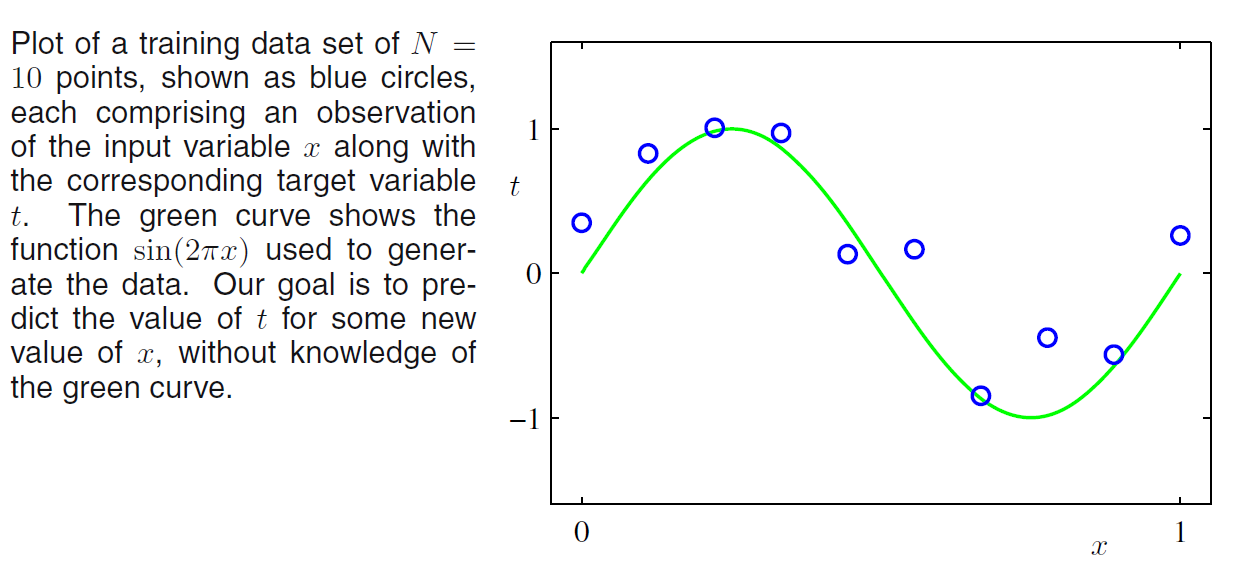

## a.

In [1237]:
x = np.random.uniform(0,1,10)
x

array([0.54529137, 0.13131252, 0.02518791, 0.4635584 , 0.16449307,
       0.65556267, 0.80796241, 0.87765567, 0.51387904, 0.91707887])

In [1238]:
t = [np.sin(np.pi * 2 * each) + np.random.normal(0, 0.3) for each in x]
t = np.array(t)
t

array([-0.55149463,  0.475345  ,  0.0302855 ,  0.07605406,  1.01924938,
       -0.78030911, -1.15640214, -1.27387953,  0.19525355, -0.5591904 ])

In [1239]:
t = t.reshape(-1, 1)
t

array([[-0.55149463],
       [ 0.475345  ],
       [ 0.0302855 ],
       [ 0.07605406],
       [ 1.01924938],
       [-0.78030911],
       [-1.15640214],
       [-1.27387953],
       [ 0.19525355],
       [-0.5591904 ]])

In [1240]:
t.shape

(10, 1)

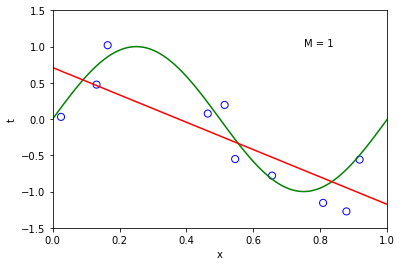

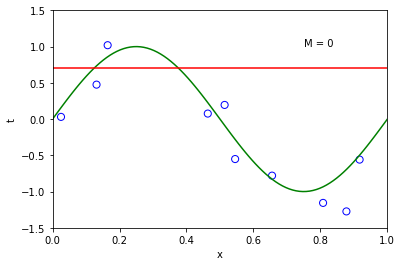

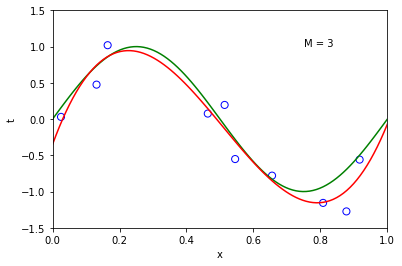

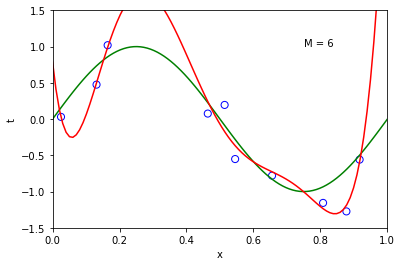

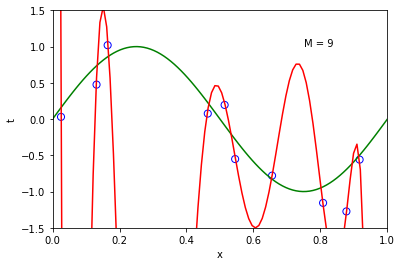

In [1241]:
for i in [1, 0, 3, 6, 9]:
    LR = LinearRegressionLR()
    LR.fit_poly(x, t, i)
    LR.plot_model_polynomial()

In [1217]:
# Comments:
print(
"""
The constant (M = 0) and first order (M = 1) polynomials are poor fits to the data and consequently 
rather poor representations of the function sin(2πx). 

The third order (M = 3) polynomial seems to give the best fit to the function sin(2πx)!

When we go to a much higher order polynomial, (M = 6 or M = 9), we obtain an excellent fit to the training
data. In fact, the polynomial with M = 9 passes exactly through each data point and E(w*) = 0.
However, the fitted curve varies so much and gives a very poor representation of
the function sin(2πx). This is over-fitting.
""")
# End of comments


The constant (M = 0) and first order (M = 1) polynomials are poor fits to the data and consequently 
rather poor representations of the function sin(2πx). 

The third order (M = 3) polynomial seems to give the best fit to the function sin(2πx)!

When we go to a much higher order polynomial, (M = 6 or M = 9), we obtain an excellent fit to the training
data. In fact, the polynomial with M = 9 passes exactly through each data point and E(w*) = 0.
However, the fitted curve varies so much and gives a very poor representation of
the function sin(2πx). This is over-fitting.



In [1218]:
# Double check with sklearn:

In [1242]:
LR = LinearRegressionLR()
LR.fit_poly(x, t, 9)
print(LR.coef())

[[ 5.17526768e+01]
 [-3.21495087e+03]
 [ 5.65667834e+04]
 [-4.57695199e+05]
 [ 2.01200884e+06]
 [-5.21080819e+06]
 [ 8.18824280e+06]
 [-7.67981926e+06]
 [ 3.95609621e+06]
 [-8.61520791e+05]]


In [1243]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9)
X_poly = poly.fit_transform(x.reshape(-1, 1))
  
poly.fit(X_poly,t)
lin2 = LinearRegression()
lin2.fit(X_poly, t)
print(lin2.coef_)
print(lin2.intercept_)


[[ 0.00000000e+00 -3.27624964e+03  5.76482664e+04 -4.66505742e+05
   2.05097850e+06 -5.31223419e+06  8.34829095e+06 -7.83049628e+06
   4.03399129e+06 -8.78543272e+05]]
[52.6593342]


## b.

In [1221]:
# n = 15

In [1222]:
x = np.random.uniform(0,1,15)
t = [np.sin(np.pi * 2 * each) + np.random.normal(0, 0.3) for each in x]
t = np.array(t)
t = t.reshape(-1, 1)

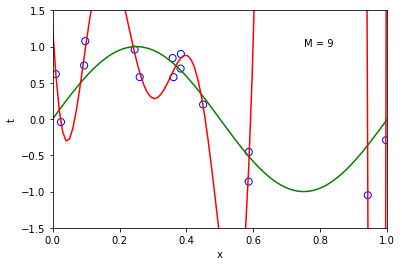

In [1223]:
LR = LinearRegressionLR()
LR.fit_poly(x, t, 9)
LR.plot_model_polynomial()

In [1224]:
# n = 100

In [1225]:
x = np.random.uniform(0,1,100)
t = [np.sin(np.pi * 2 * each) + np.random.normal(0, 0.3) for each in x]
t = np.array(t)
t = t.reshape(-1, 1)

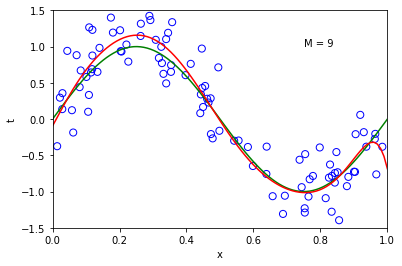

In [1226]:
LR = LinearRegressionLR()
LR.fit_poly(x, t, 9)
LR.plot_model_polynomial()

In [1227]:
# Comments of overfitting problem:
print("""
Plot M = 9 polynomial for N = 15 data points and N = 100 data points. We see that increasing the
size of the data set reduces the over-fitting problem. When N = 100, we see that, the overfitting problem is nearly solved.

We see that, for a given model complexity, the over-fitting problem become less severe
as the size of the data set increases. Another way to say this is that the larger the data set, the more
complex (in other words more flexible) the model that we can afford to fit to the data.
"""
)


Plot M = 9 polynomial for N = 15 data points and N = 100 data points. We see that increasing the
size of the data set reduces the over-fitting problem. When N = 100, we see that, the overfitting problem is nearly solved.

We see that, for a given model complexity, the over-fitting problem become less severe
as the size of the data set increases. Another way to say this is that the larger the data set, the more
complex (in other words more flexible) the model that we can afford to fit to the data.



## c.

### Ridge

In [1246]:
x = np.random.uniform(0,1,10)
t = [np.sin(np.pi * 2 * each) + np.random.normal(0, 0.3) for each in x]
t = np.array(t)
t = t.reshape(-1, 1)

In [1247]:
# Without ridge

[[ 2.45547066e+01]
 [-1.40609412e+03]
 [ 2.33578912e+04]
 [-1.71109476e+05]
 [ 6.01577946e+05]
 [-7.84664563e+05]
 [-9.80573655e+05]
 [ 4.34177630e+06]
 [-4.89824941e+06]
 [ 1.88208770e+06]]


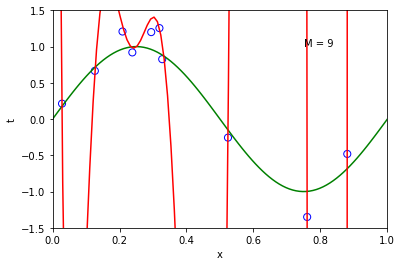

In [1248]:
LR = LinearRegressionLR()
LR.fit_poly(x, t, 9)
print(LR.coef())
LR.plot_model_polynomial()

In [1249]:
# With Ridge

[[ -0.05465322]
 [  8.87131455]
 [-15.21643312]
 [ -8.62963084]
 [  2.66706306]
 [  7.72217147]
 [  7.2123798 ]
 [  3.93325903]
 [ -0.06114018]
 [ -3.69594223]]


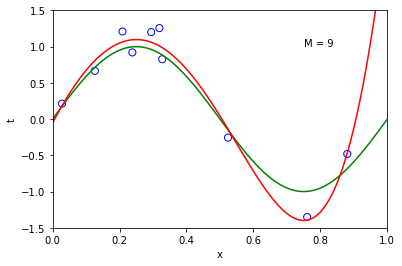

In [1250]:
LR = LinearRegressionLR()
LR.fit_poly(x, t, 9, ridge = "Y")
print(LR.coef())
LR.plot_model_polynomial()

In [1251]:
# Double check with sklearn
features = [x]
for i in range(1, 9):
        features.append(x ** (i + 1))
        
# Construct the A matrix
X = np.transpose(np.matrix([each for each in features]))
#print(X.shape)

In [1252]:
from sklearn.linear_model import Ridge
# define model
model = Ridge(alpha=0.0001)
# fit model
model.fit(X, t)

Ridge(alpha=0.0001)

In [1253]:
model.coef_

array([[  8.8713809 , -15.21659778,  -8.62954209,   2.66712563,
          7.7221781 ,   7.21235887,   3.93323513,  -0.06115461,
         -3.69594333]])

In [1254]:
model.intercept_

array([-0.05466061])

### Lasso

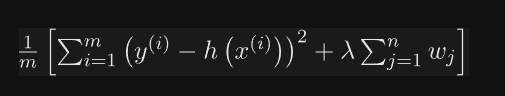

In [1235]:
x = np.random.uniform(0,1,10)
t = [np.sin(np.pi * 2 * each) + np.random.normal(0, 0.3) for each in x]
t = np.array(t)
t = t.reshape(-1, 1)

In [1255]:
# With Lasso

[ 0.99105932 -0.7458606  -1.77513803 -1.20751449 -0.44248548  0.09799568
  0.53687317  0.82993278  1.00908864  1.10471023]


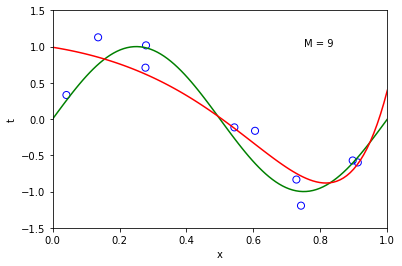

In [1236]:
LR = LinearRegressionLR()
LR.fit_poly(x, t, 9, lasso = "Y")
print(LR.coef())
LR.plot_model_polynomial(lasso= "Y")